# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


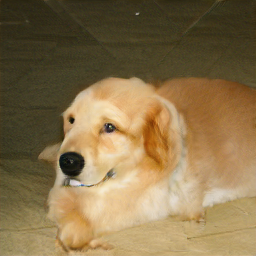

In [2]:
import torch
from pytorch_pretrained_biggan import (
    BigGAN, one_hot_from_int, truncated_noise_sample,
    save_as_images, convert_to_images
)
from IPython.display import display
from PIL import Image

# Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Generate random latent vector (noise)
truncation = 0.9
latent_vector = truncated_noise_sample(batch_size=1, dim_z=128, truncation=truncation)
latent_vector = torch.from_numpy(latent_vector).to(device)
class_vector = one_hot_from_int([207], batch_size=1)
class_vector = torch.from_numpy(class_vector).to(device)

# Generate image
with torch.no_grad():
    output = model(latent_vector, class_vector, truncation)

# Convert the tensor to a displayable image
images = convert_to_images(output.cpu())
for img in images:
    display(img)

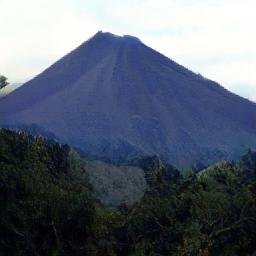

In [ ]:
# Experiment with different latent vectors
truncation = 0.9 # Adjustable truncation value
latent_vector = truncated_noise_sample(batch_size=1, dim_z=128, truncation=truncation)
latent_vector = torch.from_numpy(latent_vector).to(device)
class_vector = one_hot_from_int([980], batch_size=1)
class_vector = torch.from_numpy(class_vector).to(device)

with torch.no_grad():
    output = model(latent_vector, class_vector, truncation)

images = convert_to_images(output.cpu())
for img in images:
    display(img)

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?